In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import davies_bouldin_score
from sklearn import cluster
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
import missingno as msno
import os
from pathlib import Path 

In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [28]:
Km_data = pd.read_csv(r'C:\Users\Maxime.ALTER\ProjetFinal\data\kmean_Data.csv')\
.set_index("customer_unique_id")

In [29]:
clean_dataset(Km_data)

,total_spend,review_id,mean_review,total_nb_sellers,erreur_estimation_livraison,temps_commande_livraison,buy_freq
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,5.0,1.0,99.189722,153.869444,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,4.0,1.0,101.955000,78.854167,0.0
0000f46a3911fa3c0805444483337064,69.00,1.0,3.0,1.0,33.353611,617.562222,0.0
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,4.0,1.0,266.615278,480.890000,0.0
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,5.0,1.0,168.851111,315.387222,0.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1.0,5.0,1.0,638.633333,660.356667,0.0
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,4.0,1.0,49.527778,722.340000,0.0
ffff371b4d645b6ecea244b27531430a,89.90,1.0,5.0,1.0,707.248889,356.930000,0.0


In [30]:
Km_data_sc = preprocessing.scale(Km_data)
res = cluster.KMeans(n_clusters=4)
res.fit(Km_data_sc)

KMeans(n_clusters=4)

In [31]:
res.predict(Km_data_sc)
res.labels_
np.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([70412,  2162,  5645, 14534], dtype=int64))

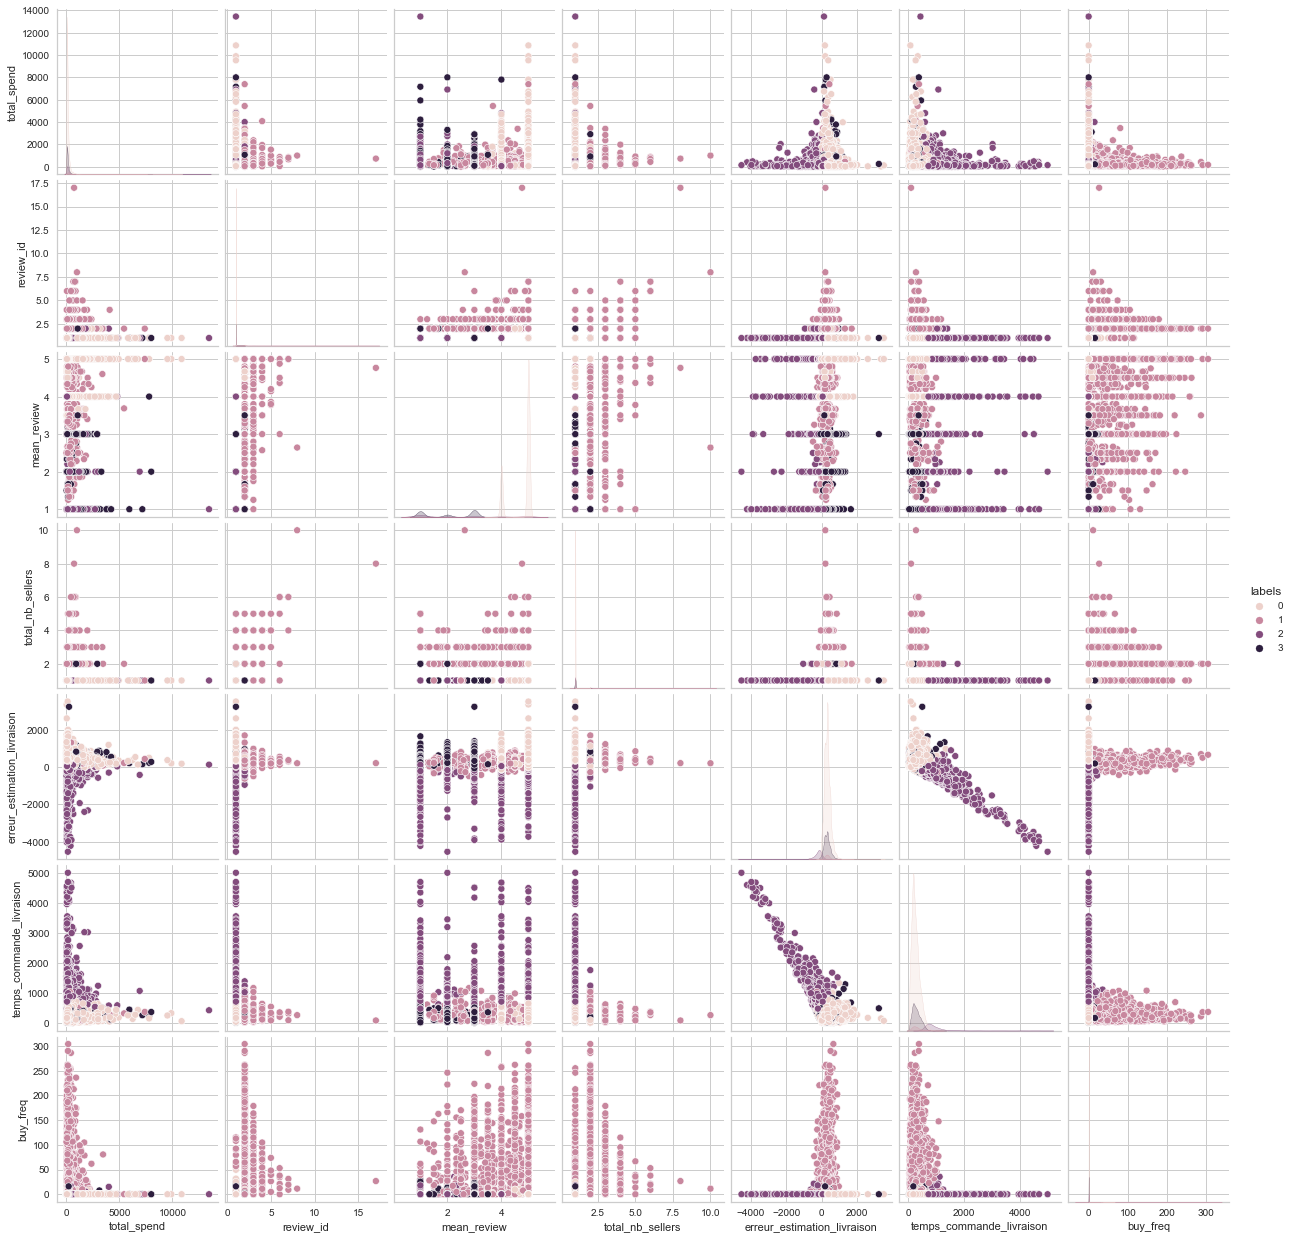

In [32]:
# Rajouter la variable au data-frame initial
Km_data_c = Km_data.copy()
Km_data_c['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(Km_data_c,hue="labels")

In [33]:
# Moyennes par groupe
gb_km = Km_data.groupby(res.labels_)
# Éffectifs par classe
gb_km.size()

0    70412
1     2162
2     5645
3    14534
dtype: int64

In [34]:
n_f = list(Km_data.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

['total_spend',
 'review_id',
 'mean_review',
 'total_nb_sellers',
 'erreur_estimation_livraison',
 'temps_commande_livraison',
 'buy_freq']

In [37]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

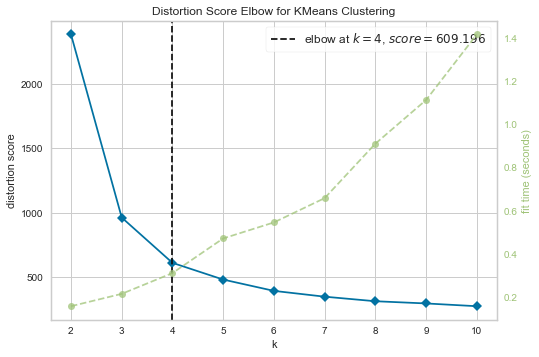

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(Km_data)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

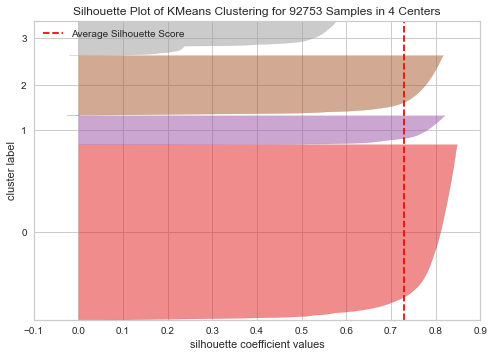

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92753 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(Km_data)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

In [45]:
davies_bouldin_score(Km_data, res.labels_)

8.554714420206992

# CSS 3 :

In [6]:
path = Path(os.getcwd()) 
p_parent = path.parent
css3 = str(p_parent) + '\data\css3.csv'

In [8]:
css3 = pd.read_csv(css3)\
.set_index("customer_unique_id")

In [9]:
css3.head()

,buy_freq,nb_heure_livraison,delivery_distance,nombre_heure_ecart_predict,order_id,price,avg_bask_price,pay_type_boleto,pay_type_credit_card,pay_type_debit_card,pay_type_not_defined,pay_type_voucher
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,1,110.496092,99.189722,1,129.90,129.90,0,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1,22.190341,101.955000,1,18.90,18.90,0,1,0,0,0
0000f46a3911fa3c0805444483337064,0.0,1,515.379484,33.353611,1,69.00,69.00,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,0.0,1,2468.983992,266.615278,1,25.99,25.99,0,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,0.0,1,154.744091,168.851111,1,180.00,180.00,0,1,0,0,0


<AxesSubplot:>

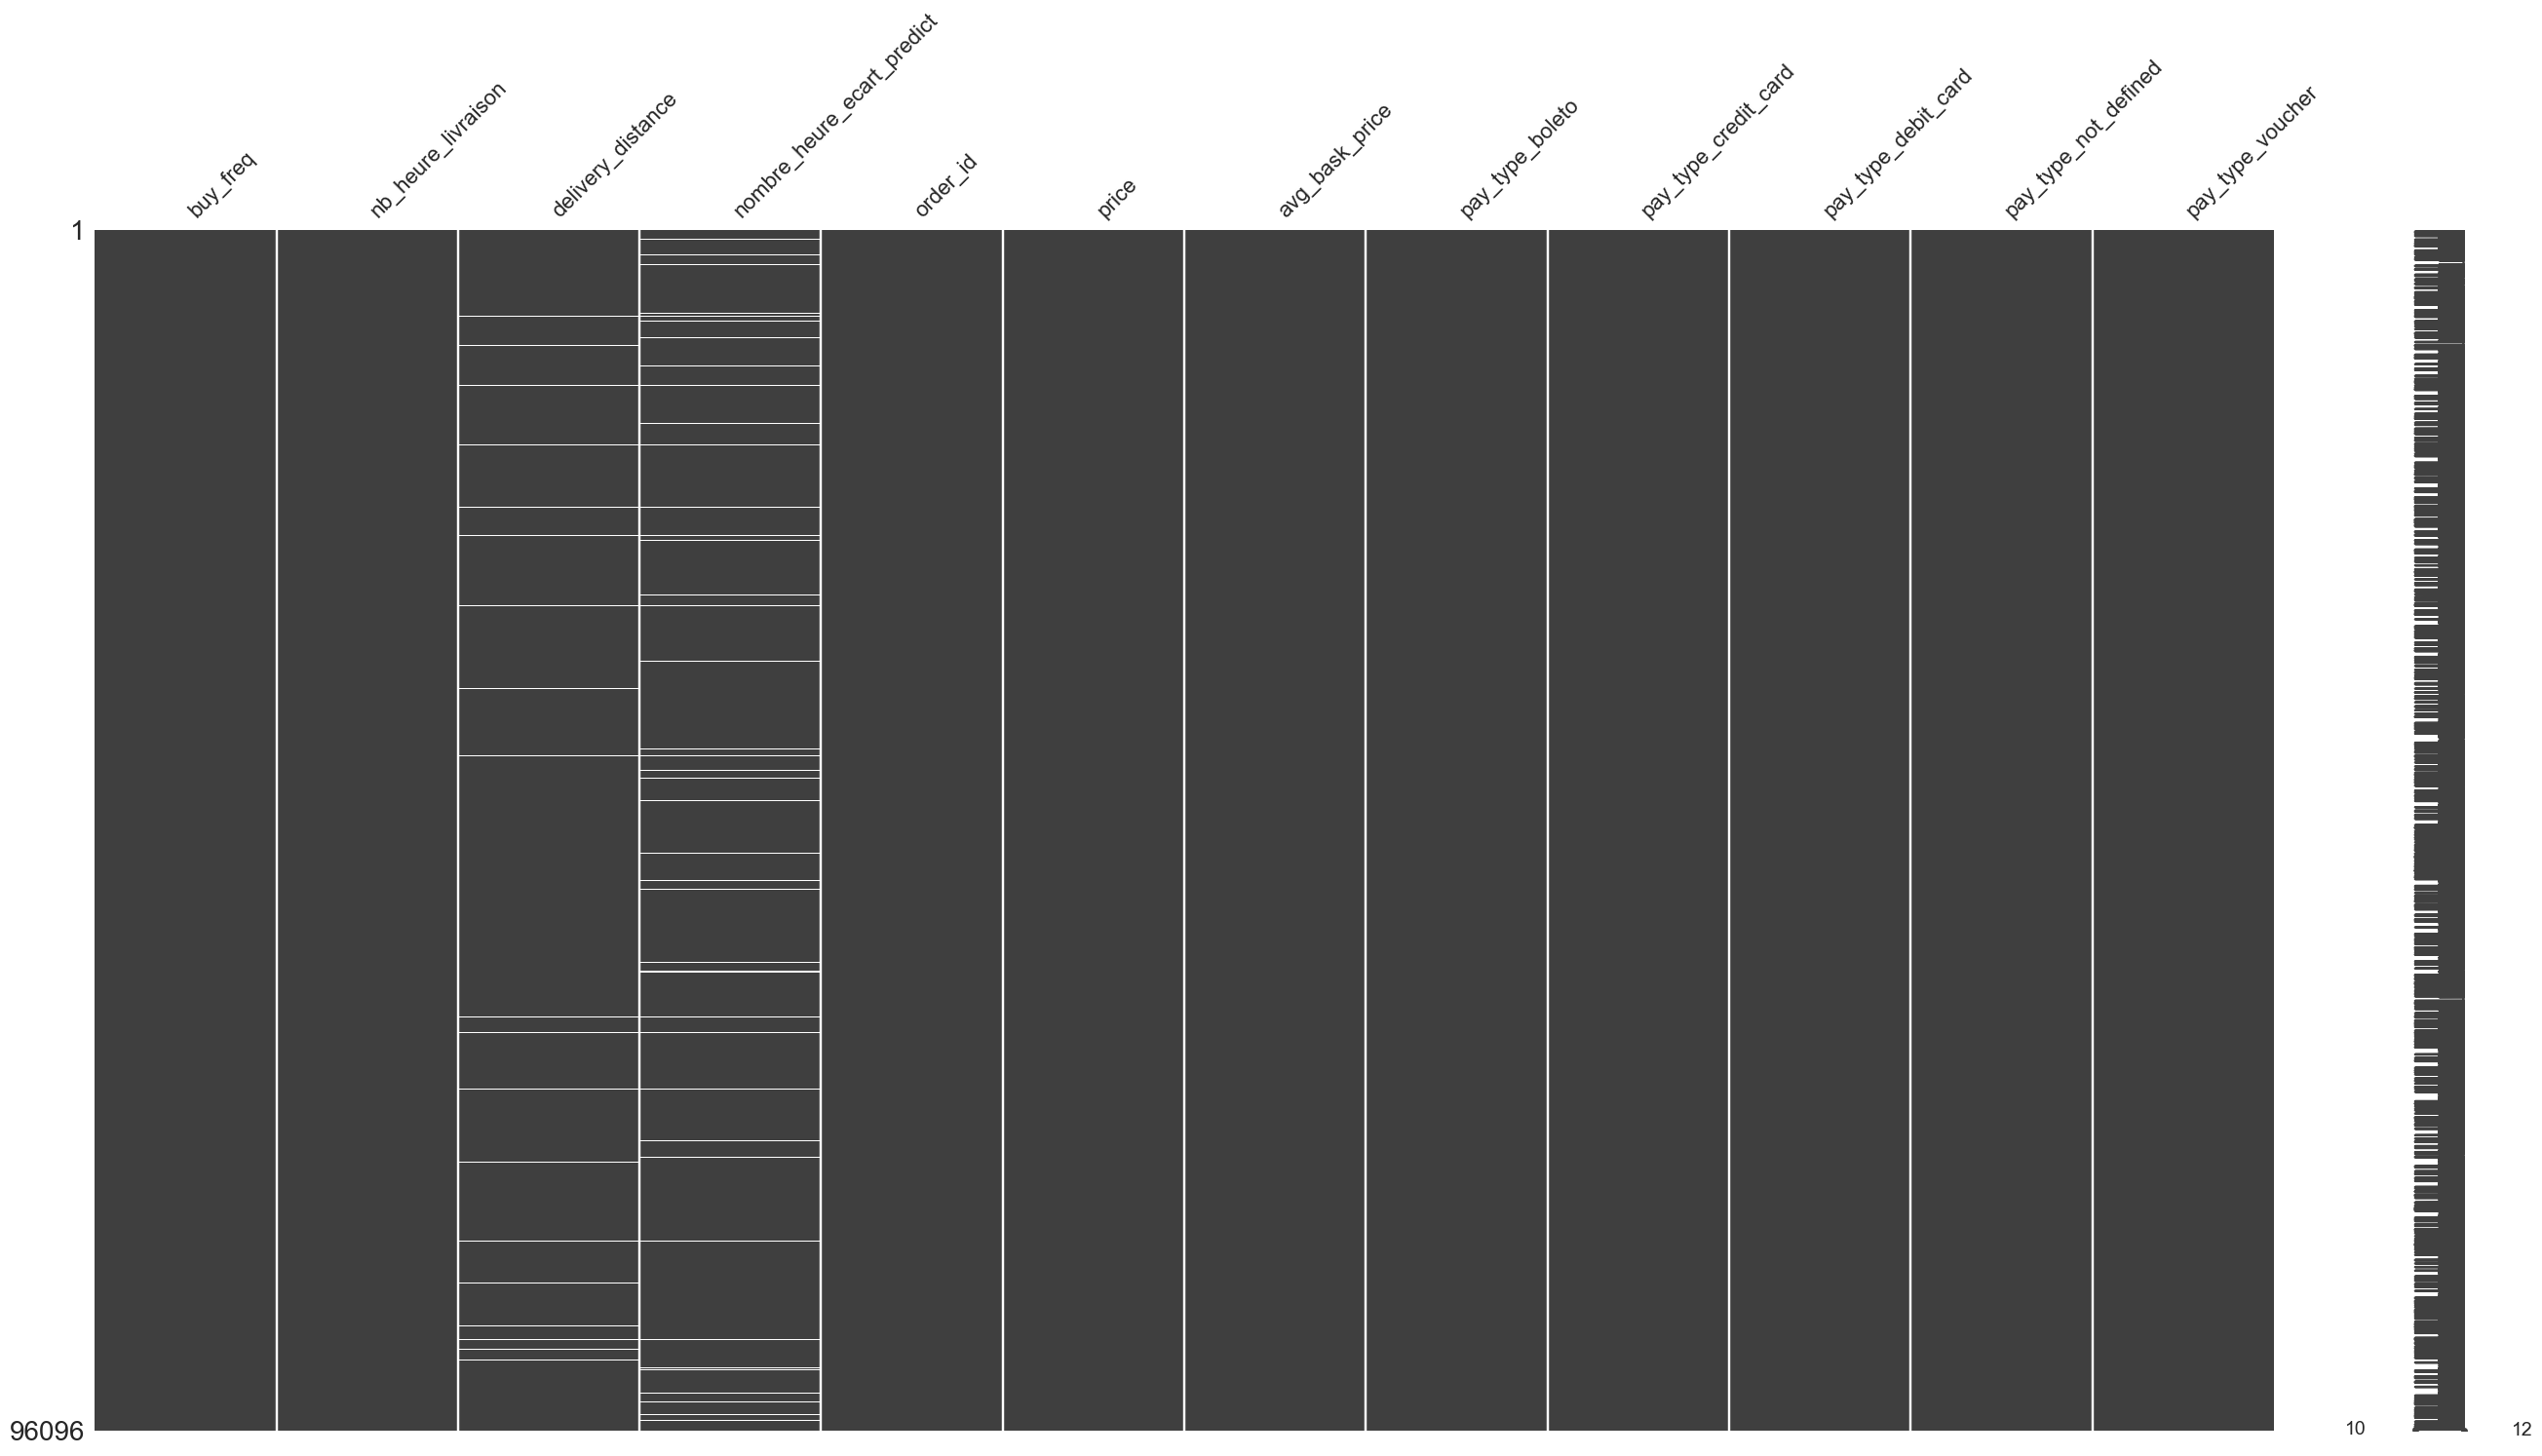

In [10]:
msno.matrix(css3, figsize=(32,16))

In [11]:
clean_dataset(css3)

,buy_freq,nb_heure_livraison,delivery_distance,nombre_heure_ecart_predict,order_id,price,avg_bask_price,pay_type_boleto,pay_type_credit_card,pay_type_debit_card,pay_type_not_defined,pay_type_voucher
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,110.496092,99.189722,1.0,129.90,129.90,0.0,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1.0,22.190341,101.955000,1.0,18.90,18.90,0.0,1.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,1.0,515.379484,33.353611,1.0,69.00,69.00,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,2468.983992,266.615278,1.0,25.99,25.99,0.0,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,1.0,154.744091,168.851111,1.0,180.00,180.00,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,1.0,1990.407282,638.633333,1.0,1570.00,1570.00,0.0,2.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,1.0,1523.628196,49.527778,1.0,64.89,64.89,0.0,1.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,1.0,1524.922045,707.248889,1.0,89.90,89.90,0.0,1.0,0.0,0.0,0.0


In [12]:
data = preprocessing.scale(css3)
res = cluster.KMeans(n_clusters=4)
res.fit(data)

KMeans(n_clusters=4)

In [13]:
res.predict(data)
res.labels_
np.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([70383,  2815, 17787,  1918], dtype=int64))

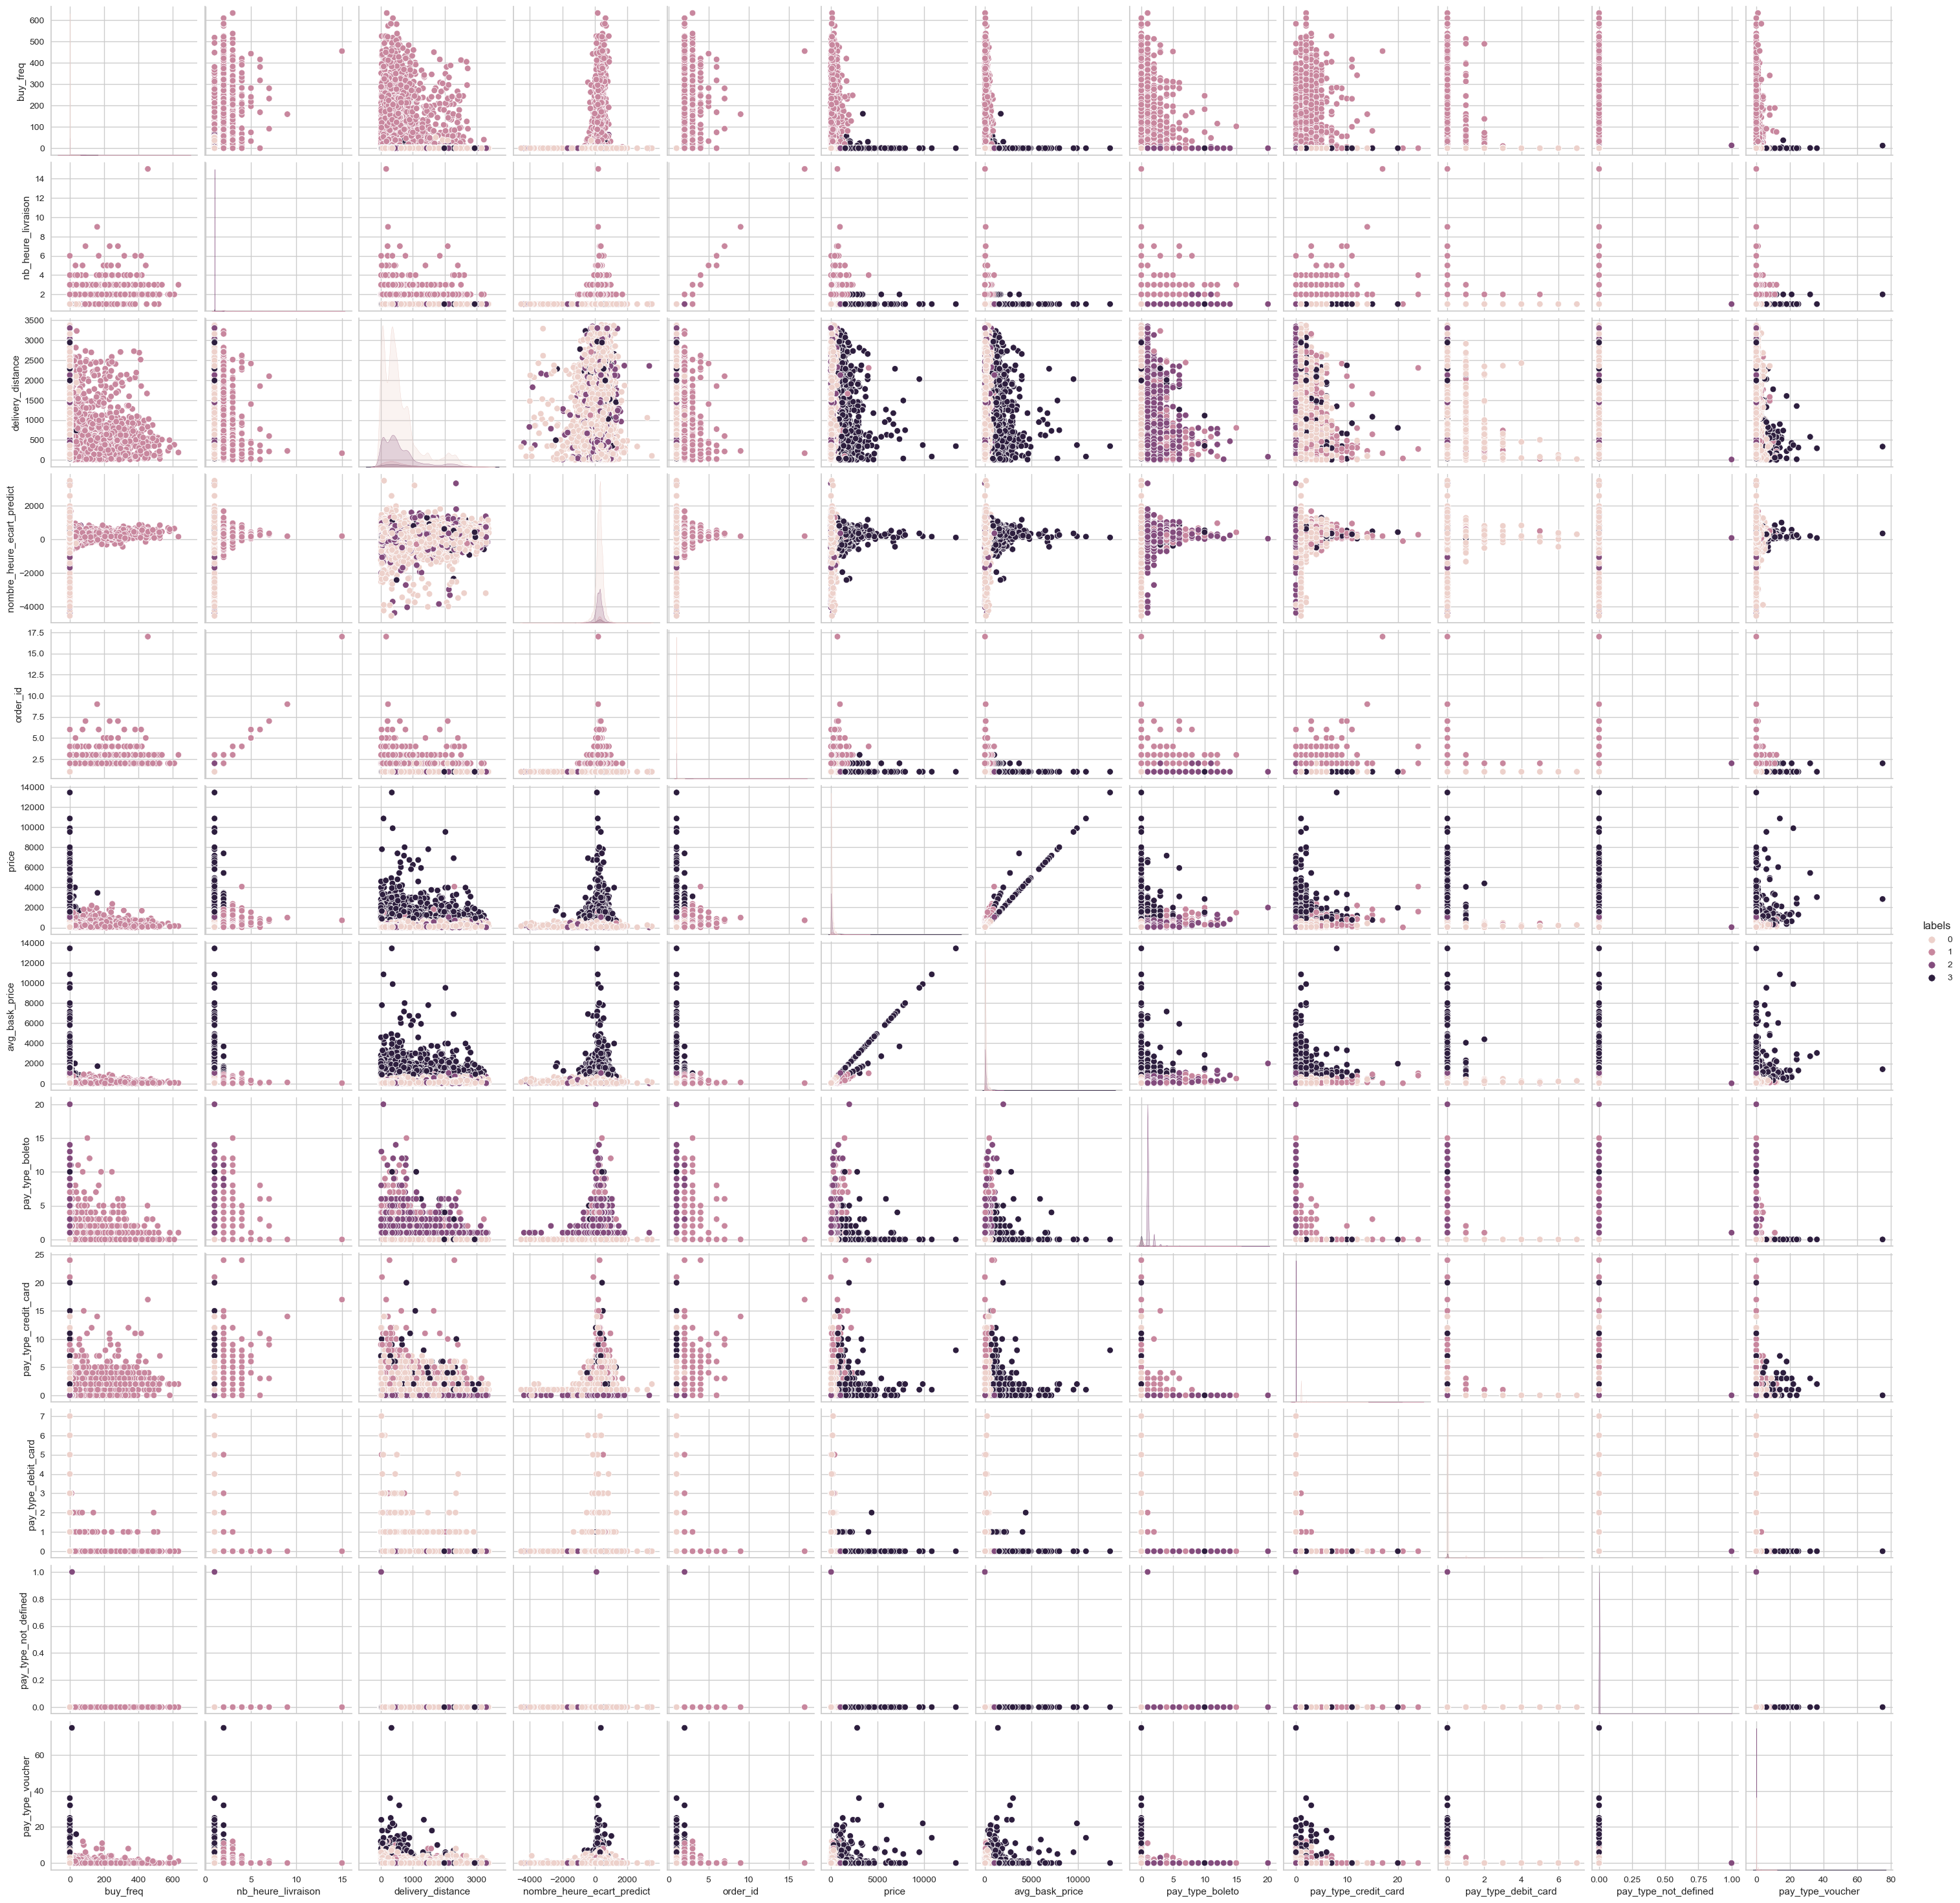

In [14]:
# Rajouter la variable au data-frame initial
data_c = css3.copy()
data_c['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(data_c,hue="labels")

In [15]:
# Moyennes par groupe
gb_km = css3.groupby(res.labels_)
# Éffectifs par classe
gb_km.size()

0    70383
1     2815
2    17787
3     1918
dtype: int64

In [16]:
n_f = list(css3.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

['buy_freq',
 'nb_heure_livraison',
 'delivery_distance',
 'nombre_heure_ecart_predict',
 'order_id',
 'price',
 'avg_bask_price',
 'pay_type_boleto',
 'pay_type_credit_card',
 'pay_type_debit_card',
 'pay_type_not_defined',
 'pay_type_voucher']

In [17]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

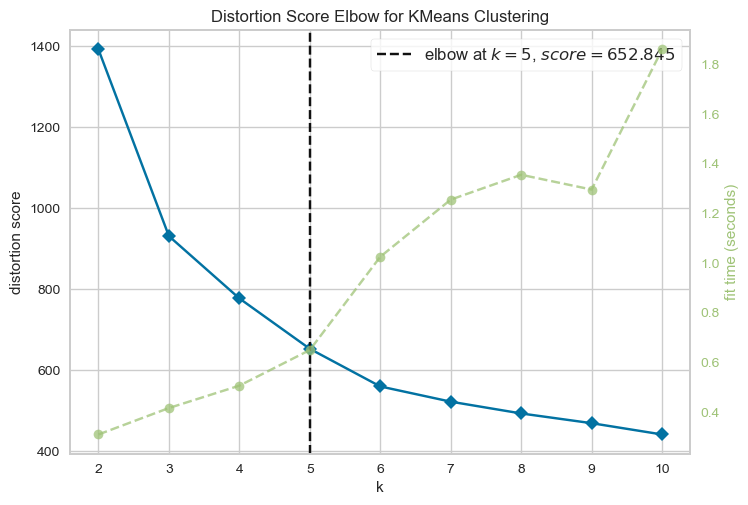

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(css3)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

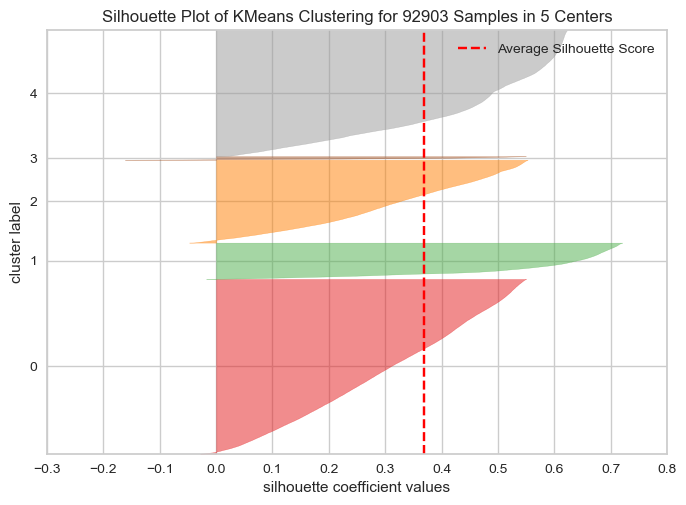

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92903 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(css3)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

In [20]:
davies_bouldin_score(css3, res.labels_)

16.70857812590746

In [93]:
group = 1 # group you want to select
group_indices = (res.labels_ == group)
group_data = data[group_indices]

In [104]:
custom_label = css3.columns
custom_label = custom_label.drop(['labels'])
print(custom_label)

Index(['buy_freq', 'nb_heure_livraison', 'delivery_distance',
       'nombre_heure_ecart_predict', 'order_id_x', 'price_x',
       'avg_bask_price_x', 'pay_type_boleto_x', 'pay_type_credit_card_x',
       'pay_type_debit_card_x', 'pay_type_not_defined_x', 'pay_type_voucher_x',
       'order_id_y', 'price_y', 'avg_bask_price_y', 'pay_type_boleto_y',
       'pay_type_credit_card_y', 'pay_type_debit_card_y',
       'pay_type_not_defined_y', 'pay_type_voucher_y'],
      dtype='object')


In [106]:
group_data = pd.DataFrame(group_data, columns=custom_label)

In [107]:
print(group_data)

   buy_freq  nb_heure_livraison  delivery_distance  \
0  0.396182           -0.159767          -0.996083   

   nombre_heure_ecart_predict  order_id_x   price_x  avg_bask_price_x  \
0                   -0.688302    4.442896 -0.402011         -0.499526   

   pay_type_boleto_x  pay_type_credit_card_x  pay_type_debit_card_x  \
0           1.301764               -1.222169              -0.115291   

   pay_type_not_defined_x  pay_type_voucher_x  order_id_y   price_y  \
0              304.798294           -0.117524    4.442896 -0.402011   

   avg_bask_price_y  pay_type_boleto_y  pay_type_credit_card_y  \
0         -0.499526           1.301764               -1.222169   

   pay_type_debit_card_y  pay_type_not_defined_y  pay_type_voucher_y  
0              -0.115291              304.798294           -0.117524  
